# Computer Vision – Detect people’s face in a picture and add an Image Filter

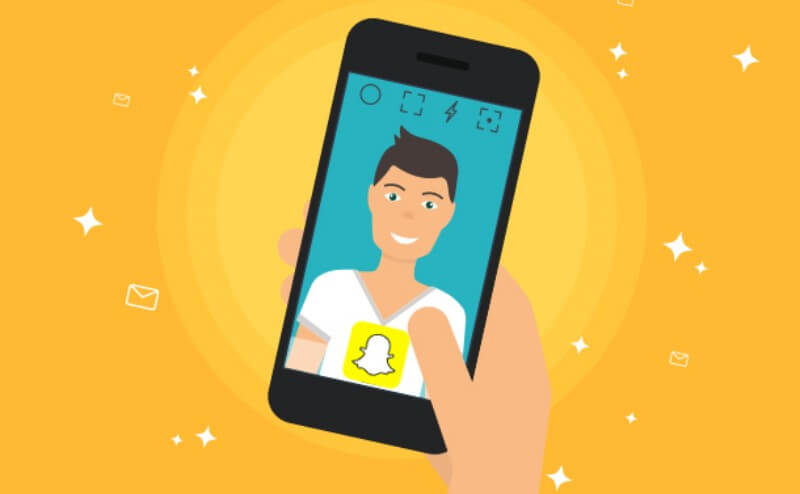

**Problem Statement**

Let's assume you want to create a new filter to use and share on your social networks to apply to pictures/videos.


**Task** 

You will need to develop a Machine Learning (ML) model which can detect people’s faces in a picture/video and then add the filter.

**Skills learned**

*   Foundations of Computer Programming, Data Science & Machine Learning (Python)


## Let's get started!

### Build a Machine Learning model to detect faces and eyes in a picture

In [ ]:
# pip3 install opencv-python

Import libraries..

In [1]:
import cv2
import numpy as np 

Initialise some variables that we will need and the ML models we will use to detect faces and eyes..

In [2]:
# path to classifiers
path = '/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/share/opencv4/haarcascades/'

# get image classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


Open the image and convert it into a format that can be used by the classifier..

In [3]:
# read image
img = cv2.imread('people4.jpg')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Now, let's use the classifier we have loaded previously as "face_cascade" to detect faces from the picture..

In [4]:
# detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

For each face found we will:
1. draw a rectangle around
2. use the previously loaded eye classifier "eye_cascade" to detect eyes
3. draw a rectangle around the eyes
4. display the image

In [7]:
# for each face
for (x, y, w, h) in faces:
    # draw rectangle around face (step 1)
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # select face as region of interest 
    roi_gray = gray[y:y+h, x:x+h]
    roi_color = img[y:y+h, x:x+h]
    # within region of interest find eyes (step 2) 
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    # for each eye
    for (ex, ey, ew, eh) in eyes:
        # draw retangle around eye (step 3)
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Step 4 - display the image
#cv2.imshow('img', cv2.resize(img, (960, 540))) # showing the image
#cv2.waitKey(0) # waiting until a key is pressed to progress
#cv2.destroyAllWindows() # closing the window if a key is pressed


**Question:**
Try using the other people's photos. What happens? 
Why do you think this happens?

Well Done on completing this section!

### Build a Machine Learning model to detect faces and eyes in a live video

Now, let's detect faces and eyes from a live video. We will start the webcam..

Starting the webcam and extracting the height and width of the image captured..

In [12]:
import cv2
import numpy as np 

# path to classifiers
path = '/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/share/opencv4/haarcascades/'

# get image classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


# read video
cap = cv2.VideoCapture(0)
ret, img = cap.read()
img_h, img_w = img.shape[:2]

Let's use the previous code to detect faces in a live video..

Complete the code below:

In [13]:
# While the webcam is still active
while True:   # continue to run until user breaks loop
    
    # read each frame of video and convert to gray
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image using classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # TO DO (Hint: have a look at the previous code we used)
    # for every face found:
    for (x, y, w, h) in faces:
        # draw rectangle around face (step 1)
        
        # select face as region of interest 
        
        
        # within region of interest find eyes (step 2) 
        
        
        # for each eye
        
            # draw retangle around eye (step 3)
            
            

    # display image
    cv2.imshow('img', img) 

    # if user pressed 'q', close the window
    if cv2.waitKey(1) == ord('q'): 
        break

cap.release() # turn off camera 
cv2.destroyAllWindows() # close all windows


Well Done on completing this section!

### Build a Machine Learning model to apply a filter to a picture

Let's initialise the variables we will need..

Opening the filter image..

In [14]:
import cv2
import numpy as np 

# path to classifiers
path = '/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/share/opencv4/haarcascades/'

# get image classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# read image
img = cv2.imread('people4.jpg')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# open the filter image
filter = cv2.imread('witch.png')

Extract relevant information from the images (e.g. height and width) and convert to a format that will be good to use with the classifier.. 

In [18]:
#get shape of filter
original_filter_h, original_filter_w, filter_channels = filter.shape

#get shape of img
img_h, img_w, img_channels = img.shape

#convert to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filter_gray = cv2.cvtColor(filter, cv2.COLOR_BGR2GRAY)

# create a mask and an inverse mask of the filter
# Note: use THRESH_BINARY_INV if the filter image already has a transparent background,
# use cv2.THRESH_BINARY if you are using a white background
ret, original_mask = cv2.threshold(filter_gray, 10, 255, cv2.THRESH_BINARY_INV)
original_mask_inv = cv2.bitwise_not(original_mask)

Detect faces as we did before and for each face detected add the filter at the right coordinates (where the face is)

In [20]:
#find faces in image using classifier
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

for (x,y,w,h) in faces:
    # coordinates of face region
    face_w = w
    face_h = h
    face_x1 = x
    face_x2 = face_x1 + face_w
    face_y1 = y
    face_y2 = face_y1 + face_h

    # filter size in relation to face by scaling
    filter_width = int(1.5 * face_w)
    filter_height = int(filter_width * original_filter_h / original_filter_w)
    
    # setting location of coordinates of filter
    filter_x1 = face_x2 - int(face_w/2) - int(filter_width/2)
    filter_x2 = filter_x1 + filter_width
    filter_y1 = face_y1 - int(face_h * 1.25)
    filter_y2 = filter_y1 + filter_height

    # check to see if out of frame
    if filter_x1 < 0:
        filter_x1 = 0
    if filter_y1 < 0:
        filter_y1 = 0
    if filter_x2 > img_w:
        filter_x2 = img_w
    if filter_y2 > img_h:
        filter_y2 = img_h

    # Account for any out of frame changes
    filter_width = filter_x2 - filter_x1
    filter_height = filter_y2 - filter_y1

    # resize filter to fit on face
    filter = cv2.resize(filter, (filter_width,filter_height), interpolation = cv2.INTER_AREA)
    mask = cv2.resize(original_mask, (filter_width,filter_height), interpolation = cv2.INTER_AREA)
    mask_inv = cv2.resize(original_mask_inv, (filter_width,filter_height), interpolation = cv2.INTER_AREA)

    # take ROI for filter from background that is equal to size of filter image
    roi = img[filter_y1:filter_y2, filter_x1:filter_x2]

    # original image in background (bg) where filter is not present
    roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
    roi_fg = cv2.bitwise_and(filter,filter,mask=mask_inv)
    dst = cv2.add(roi_bg,roi_fg)

    # put back in original image
    img[filter_y1:filter_y2, filter_x1:filter_x2] = dst


#cv2.imshow('img', cv2.resize(img, (960, 540)))
#cv2.waitKey(0)
#cv2.destroyAllWindows()


**Question:**
Try using the other people's photos. What happens? 
How can you fix this?

Well Done on completing this section!

### BONUS: Build a Machine Learning model to apply a filter to a live video

By looking at the previous code we have written, can you apply the filter to a live video (use the webcam video as we did before..)?

In [22]:
import cv2
import numpy as np 

# path to classifiers
path = '/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/share/opencv4/haarcascades/'

# get image classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# read images
filter = cv2.imread('witch.png')

# get shape of filter
original_filter_h, original_filter_w, filter_channels = filter.shape

# convert to gray
filter_gray = cv2.cvtColor(filter, cv2.COLOR_BGR2GRAY)

# create mask and inverse mask of filter
ret, original_mask = cv2.threshold(filter_gray, 10, 255, cv2.THRESH_BINARY_INV)
original_mask_inv = cv2.bitwise_not(original_mask)

# read video
cap = cv2.VideoCapture(0)
ret, img = cap.read()
img_h, img_w = img.shape[:2]

# save video to file
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))

while True:   # continue to run until user breaks loop
    
    # read each frame of video and convert to gray
    ret, img = cap.read()
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image using classifier
    faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
    
    # TO DO
    # for every face found:
    for (x,y,w,h) in faces:

        # coordinates of face region
        






        # filter size in relation to face by scaling


        
        # setting location of coordinates of filter





        # check to see if out of frame









        # Account for any out of frame changes



        # resize filter to fit on face




        # take ROI for filter from background that is equal to size of filter image


        # original image in background (bg) where filter is not present




        # put back in original image
        
        

        # write video to file
        out.write(img)
        break

    # display image
    cv2.imshow('img', img) 

    # if user pressed 'q' break
    if cv2.waitKey(1) == ord('q'): # 
        break;

cap.release() #turn off camera 
cv2.destroyAllWindows() #close all windows


Well Done on completing this section!